# Testing GraphSearch Distance Concepts

## Load Libraries

In [1]:
import numpy as np
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from models.srex.ranking import Ranking
from utils.data_utils import DataUtils

## Initialize some variables

In [2]:
# Load Stop Words
stop_words_list = DataUtils.load_stopwords()

In [3]:
#query                     = 'iot'
query                     = 'information AND retrieval'
#query                    = '"internet of things" OR iot'
#query                     'a!"#$"#"$"'
#query                     = 'query AND (expansion OR refinement)'
#query                    = '("Document Title":internet of things   OR   ("Document Title":iot  AND "Document Title":device  )  )  AND ("Abstract":security NOT  "Abstract":visual OR "Document Title":network)'
#query                    = '((( literature  OR document OR information OR data ) AND (retrieval OR retrieve)) OR (search AND engine)  )  AND  (query AND  ( expansion OR refinement OR reformulation))'
nr_search_results        = 10

ranking_weight_type      = 'linear' # it can be: 'none', 'linear' or 'inverse'
lema                     = True
stem                     = False
summarize                = 'mean'   # it can be: 'mean' or 'median'
nr_of_graph_terms        = 10
limit_distance           = 4 
include_query_terms      = False

## Calculate Ranking data structure

In [4]:
ranking = Ranking(query, nr_search_results, ranking_weight_type, stop_words_list, lema, stem)
ranking.calculate_ieee_xplore_ranking()
#ranking.calculate_article_dictionaries_list([{}])
#articles = ranking.get_ieee_xplore_ranking()
#dicts = [{"title": a.get('title', ''), "abstract": a.get('abstract', ''), "article_number": a.get('article_number', '')} for a in articles]
#import json
#print(json.dumps(dicts, indent=2))

## Generate all graphs from ranking, documents and sentences

In [5]:
ranking.generate_all_graphs(nr_of_graph_terms, limit_distance, include_query_terms, summarize)

In [6]:
for index, d in enumerate(ranking.get_documents()):
    print(f"{index+1}. TITLE: {d.get_title()} (id:{d.get_doc_id()})")
    for s in d.get_sentences():
        print(f"txt: {s.get_preprocessed_text()}")

1. TITLE: The Prediction of the High-Cost Non-Cumulative Discounted Gain and Precision Performance Metrics in Information Retrieval Evaluation (id:9497989)
txt: prediction high cost non cumulative discounted gain precision performance metric information retrieval evaluation
txt: information retrieval system play critical role meeting information need user
txt: high effectiveness expected system user make decision based retrieval result
txt: effectiveness system varies known retrieval evaluation main approach evaluating system test collection model comprises corpus document topic relevance judgment
txt: one limitation approach cost generating relevance judgment
txt: recent solution limitation prediction performance metric high evaluation depth document system score performance metric computed low evaluation depth
txt: solution drawback inaccurate prediction non cumulative discounted gain ndcg precision performance metric high evaluation depth document performance metric computed low eva

In [7]:
for d in ranking.get_documents():
    print(f"doc: {d.get_title()}")
    for s in d.get_sentences():
        print(f"vecinity matrix: {s.get_vicinity_matrix()}")

doc: The Prediction of the High-Cost Non-Cumulative Discounted Gain and Precision Performance Metrics in Information Retrieval Evaluation
vecinity matrix: {'gain': {'information': [0, 0, 0, 1]}, 'precision': {'information': [0, 0, 1, 0], 'retrieval': [0, 0, 0, 1]}, 'performance': {'information': [0, 1, 0, 0], 'retrieval': [0, 0, 1, 0]}, 'metric': {'information': [1, 0, 0, 0], 'retrieval': [0, 1, 0, 0]}, 'evaluation': {'information': [0, 1, 0, 0], 'retrieval': [1, 0, 0, 0]}}
vecinity matrix: {'system': {'information': [0, 1, 0, 0], 'retrieval': [1, 0, 0, 0]}, 'play': {'information': [0, 0, 1, 1], 'retrieval': [0, 1, 0, 0]}, 'critical': {'information': [0, 0, 1, 1], 'retrieval': [0, 0, 1, 0]}, 'role': {'information': [0, 1, 0, 0], 'retrieval': [0, 0, 0, 1]}, 'meeting': {'information': [1, 0, 0, 0]}, 'need': {'information': [1, 0, 0, 0]}, 'user': {'information': [0, 1, 0, 0]}}
vecinity matrix: {'user': {'retrieval': [0, 0, 0, 1]}, 'make': {'retrieval': [0, 0, 1, 0]}, 'decision': {'retriev

In [8]:
#Show graphs from the ranking class
print(ranking.get_graph())

SUBQUERY: information AND retrieval
TERM: based ; TOTAL_PONDERATION: 25.65 ; PROXIMITY_PONDERATION: 15.77 ; DISTANCE: 2.3 ; CRITERIA: proximity
TERM: system ; TOTAL_PONDERATION: 19.9 ; PROXIMITY_PONDERATION: 11.75 ; DISTANCE: 1.9 ; CRITERIA: proximity
TERM: multimedia ; TOTAL_PONDERATION: 12.7 ; PROXIMITY_PONDERATION: 8.82 ; DISTANCE: 1.8 ; CRITERIA: proximity
TERM: model ; TOTAL_PONDERATION: 11.4 ; PROXIMITY_PONDERATION: 7.99 ; DISTANCE: 1.8 ; CRITERIA: proximity
TERM: ontology ; TOTAL_PONDERATION: 8.9 ; PROXIMITY_PONDERATION: 5.4 ; DISTANCE: 3.0 ; CRITERIA: proximity
TERM: semantic ; TOTAL_PONDERATION: 7.1 ; PROXIMITY_PONDERATION: 4.1 ; DISTANCE: 2.2 ; CRITERIA: proximity
TERM: medium ; TOTAL_PONDERATION: 5.7 ; PROXIMITY_PONDERATION: 4.09 ; DISTANCE: 1.6 ; CRITERIA: proximity
TERM: unstructured ; TOTAL_PONDERATION: 3.5 ; PROXIMITY_PONDERATION: 3.71 ; DISTANCE: 1.6 ; CRITERIA: proximity
TERM: architecture ; TOTAL_PONDERATION: 6.35 ; PROXIMITY_PONDERATION: 3.65 ; DISTANCE: 3.0 ; CRITER

In [38]:
#Show a subgraph from the ranking class
#print(ranking.get_query_tree().get_graph_by_subquery("retrieval"))
print(ranking.get_document_by_ranking_position(2).get_sentence_by_position_in_doc(1).get_graph_by_subquery("retrieval"))

SUBQUERY: retrieval
TERM: multimedia ; TOTAL_PONDERATION: 0.0 ; PROXIMITY_PONDERATION: 1.24 ; DISTANCE: 1.5 ; CRITERIA: proximity
TERM: moving ; TOTAL_PONDERATION: 0.0 ; PROXIMITY_PONDERATION: 1.24 ; DISTANCE: 3.0 ; CRITERIA: proximity
TERM: forward ; TOTAL_PONDERATION: 0.0 ; PROXIMITY_PONDERATION: 1.24 ; DISTANCE: 3.0 ; CRITERIA: proximity
TERM: single ; TOTAL_PONDERATION: 0.0 ; PROXIMITY_PONDERATION: 1.24 ; DISTANCE: 3.0 ; CRITERIA: proximity
TERM: medium ; TOTAL_PONDERATION: 0.0 ; PROXIMITY_PONDERATION: 1.24 ; DISTANCE: 1.0 ; CRITERIA: proximity
TERM: based ; TOTAL_PONDERATION: 0.0 ; PROXIMITY_PONDERATION: 1.24 ; DISTANCE: 1.0 ; CRITERIA: proximity
TERM: content ; TOTAL_PONDERATION: 0.0 ; PROXIMITY_PONDERATION: 1.24 ; DISTANCE: 3.5 ; CRITERIA: proximity
TERM: feature ; TOTAL_PONDERATION: 0.0 ; PROXIMITY_PONDERATION: 1.24 ; DISTANCE: 3.5 ; CRITERIA: proximity
TERM: correlation ; TOTAL_PONDERATION: 0.0 ; PROXIMITY_PONDERATION: 1.24 ; DISTANCE: 3.5 ; CRITERIA: proximity
TERM: used ; TO

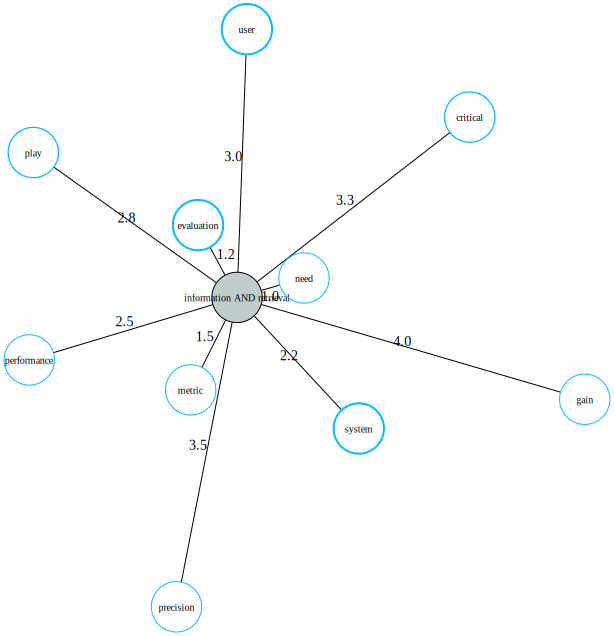

In [11]:
visual_graph1 = ranking.get_document_by_ranking_position(1).get_graph().get_graph_viz('0.7', 'deepskyblue')
visual_graph1

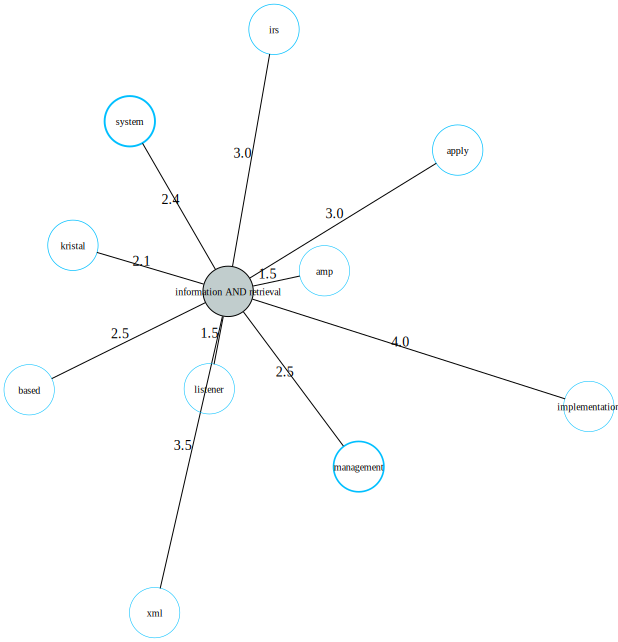

In [12]:
visual_graph2 = ranking.get_document_by_ranking_position(10).get_graph().get_graph_viz('0.7', 'deepskyblue')
visual_graph2

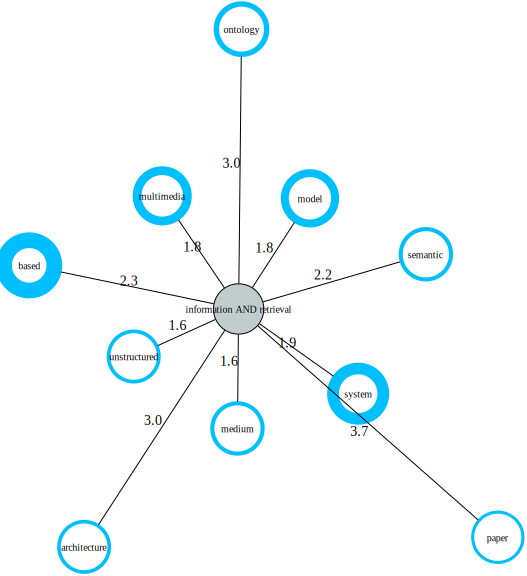

In [13]:
visual_graph = ranking.get_graph().get_graph_viz('0.7', 'deepskyblue')
visual_graph

In [22]:
ranking.get_graph().get_similarity_score_as_base_graph(ranking.get_document_by_ranking_position(10).get_graph())

1.4690367982358277

## Comparing Top 2 sentences graphs average similarities with ranking graph

In [12]:
# Top 2 sentence graphs by doc function
def get_top2_graph_sentences(doc, include_ponderation=False):
    g_user = ranking.get_graph()
    top2_graph_sentences = []
    for s in doc.get_sentences():
        if s.get_graph().get_graph_as_dict():
            top2_graph_sentences.append((s.get_position_in_doc(), g_user.get_similarity_score_as_base_graph(s.get_graph(), include_ponderation)))

    if len(top2_graph_sentences) == 1:
        return ((top2_graph_sentences[0][0],top2_graph_sentences[0][0]), 
                (doc.get_sentence_by_position_in_doc(top2_graph_sentences[0][0]).get_graph(),doc.get_sentence_by_position_in_doc(top2_graph_sentences[0][0]).get_graph()))
    top2_graph_sentences = sorted(top2_graph_sentences, key=lambda tuple: tuple[1], reverse=True)[:2]
    # return -> ((pos_in_doc_1, pos_in_doc_2), (graph1, graph2))
    return ((top2_graph_sentences[0][0], top2_graph_sentences[1][0]), 
            (doc.get_sentence_by_position_in_doc(top2_graph_sentences[0][0]).get_graph(), doc.get_sentence_by_position_in_doc(top2_graph_sentences[1][0]).get_graph()))


# Average similarities by document function
def avg_sim_doc(g_doc_top2_sentences, include_ponderation=False):
    graph_user = ranking.get_graph()
    sim_doc_top1 = graph_user.get_similarity_score_as_base_graph(g_doc_top2_sentences[0], include_ponderation)
    sim_doc_top2 = graph_user.get_similarity_score_as_base_graph(g_doc_top2_sentences[1], include_ponderation)
    avg_sim_doc = (sim_doc_top1 + sim_doc_top2) / 2
    return avg_sim_doc


def print_top2_sentences_by_doc_similarity(include_ponderation: bool = False):
    g_docs_top2_sentences = []
    avg_sim_docs = []

    for index1 in range(nr_search_results):
        g_docs_top2_sentences.append(get_top2_graph_sentences(ranking.get_document_by_ranking_position(index1+1), include_ponderation))

    for index2 in range(nr_search_results):
        avg_sim_docs.append(avg_sim_doc(g_docs_top2_sentences[index2][1], include_ponderation))
        
    for index3 in range(nr_search_results):
        print(f"doc {index3+1} top 2 sentences: {g_docs_top2_sentences[index3][0]}")
        print(f"doc {index3+1} similarity: {avg_sim_docs[index3]}")
    


tple_doc1 = get_top2_graph_sentences(ranking.get_document_by_ranking_position(1))
tple_doc2 = get_top2_graph_sentences(ranking.get_document_by_ranking_position(10))
doc1_doc2_sentence_top1_union = tple_doc1[1][0].get_union_to_graph(tple_doc2[1][0])
doc1_doc2_sentence_top2_union = tple_doc1[1][1].get_union_to_graph(tple_doc2[1][1])

print(f"doc 1 top 1 sentence similarity: {tple_doc1[1][0].get_similarity_score_as_base_graph(doc1_doc2_sentence_top1_union)}")
print(f"doc 10 top 1 sentence similarity: {tple_doc2[1][0].get_similarity_score_as_base_graph(doc1_doc2_sentence_top1_union)}")

print(f"\ndoc 1 top 2 sentence similarity: {tple_doc1[1][1].get_similarity_score_as_base_graph(doc1_doc2_sentence_top2_union)}")
print(f"doc 10 top 2 sentence similarity: {tple_doc2[1][1].get_similarity_score_as_base_graph(doc1_doc2_sentence_top2_union)}")

print("\nSimilarity without include_ponderations")
print_top2_sentences_by_doc_similarity(include_ponderation=False)
     
print("\nSimilarity with include_ponderations")
print_top2_sentences_by_doc_similarity(include_ponderation=True)

doc 1 top 1 sentence similarity: 0.0
doc 10 top 1 sentence similarity: 0.0

doc 1 top 2 sentence similarity: 0.0
doc 10 top 2 sentence similarity: 0.0

Similarity without include_ponderations
doc 1 top 2 sentences: (2, 1)
doc 1 similarity: 0.24168712537388104
doc 2 top 2 sentences: (2, 0)
doc 2 similarity: 0.15768298256298946
doc 3 top 2 sentences: (1, 0)
doc 3 similarity: 0.16037092574259182
doc 4 top 2 sentences: (1, 0)
doc 4 similarity: 0.14837212701851318
doc 5 top 2 sentences: (1, 7)
doc 5 similarity: 0.3064252800990529
doc 6 top 2 sentences: (6, 2)
doc 6 similarity: 0.257979753711824
doc 7 top 2 sentences: (3, 0)
doc 7 similarity: 0.30374485343112667
doc 8 top 2 sentences: (6, 1)
doc 8 similarity: 0.14045456013500002
doc 9 top 2 sentences: (1, 0)
doc 9 similarity: 0.0413793262320421
doc 10 top 2 sentences: (1, 0)
doc 10 similarity: 0.0005367500000000303

Similarity with include_ponderations
doc 1 top 2 sentences: (1, 2)
doc 1 similarity: 0.7495127544018045
doc 2 top 2 sentences: 

## Comparing document graph similarities with ranking graph

In [13]:
def print_documents_similatity(include_ponderation: bool = False):
    for index, doc in enumerate(ranking.get_documents()):
        print(f"doc {index+1}: {ranking.get_graph().get_viewable_graph_copy().get_similarity_score_as_base_graph(doc.get_graph(), include_ponderation)}")

print("Similarities by document without include_ponderations")
print_documents_similatity(include_ponderation=False)

print("\nSimilarities by document without include_ponderations")
print_documents_similatity(include_ponderation=True)

Similarities by document without include_ponderations
doc 1: 0.21969433874337516
doc 2: 0.13701415700110045
doc 3: 0.13865998518778863
doc 4: 0.10111223871218013
doc 5: 0.07777783333333332
doc 6: 0.3574382794745051
doc 7: 0.29225546975829025
doc 8: inf
doc 9: 0.050000000000000044
doc 10: 0.0010735000000000605

Similarities by document without include_ponderations
doc 1: 0.43582957742419154
doc 2: 0.5972018374621983
doc 3: 0.709998441609195
doc 4: 0.3504719354340381
doc 5: 0.5295070354267388
doc 6: 0.6018517753865156
doc 7: 0.5794579103319546
doc 8: inf
doc 9: 0.31626371678998066
doc 10: 0.500001152400922


## Generating ranking graph from Top 2 sentences by document


Similarity without include_ponderations
doc 1 top 2 sentences: (0, 1)
doc 1: 0.1087539946833373
doc 2 top 2 sentences: (0, 2)
doc 2: 0.12055514931868314
doc 3 top 2 sentences: (0, 1)
doc 3: 0.1297399324280864
doc 4 top 2 sentences: (0, 1)
doc 4: 0.12891322521866322
doc 5 top 2 sentences: (0, 1)
doc 5: 0.09027783333333328
doc 6 top 2 sentences: (0, 1)
doc 6: 0.08988481192043636
doc 7 top 2 sentences: (0, 1)
doc 7: 0.06273899999999999
doc 8 top 2 sentences: (0, 1)
doc 8: inf
doc 9 top 2 sentences: (0, 1)
doc 9: 0.00694450000000002
doc 10 top 2 sentences: (0, 1)
doc 10: 0.02059433333333327
ranking graph number of neighbour terms: 88

Similarity with include_ponderations
doc 1 top 2 sentences: (0, 1)
doc 1: 0.6075136162176442
doc 2 top 2 sentences: (0, 2)
doc 2: 0.5143282454107008
doc 3 top 2 sentences: (0, 1)
doc 3: 0.5061535487941411
doc 4 top 2 sentences: (0, 1)
doc 4: 0.9079528533857139
doc 5 top 2 sentences: (0, 1)
doc 5: 0.11832008229424439
doc 6 top 2 sentences: (0, 1)
doc 6: 0.700

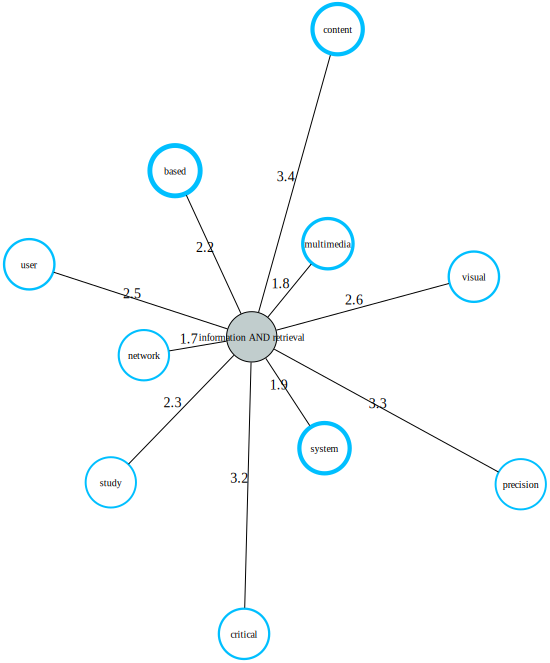

In [14]:
# Get the average similarity with all documents in the ranking, excluding its own document graphs
def get_avg_sim_with_all_sentences(doc_ranking_position: int, local_sentence_graph, include_ponderation: bool = False) -> float:
    avg_sim_values = []
    for index, doc in enumerate(ranking.get_documents()):
        if (doc_ranking_position - 1) != index:
            for s in doc.get_sentences():
                if s.get_graph().get_graph_as_dict():   # if the graph contains at least one neighbour term
                    avg_sim_values.append(local_sentence_graph.get_similarity_score_as_base_graph(s.get_graph(), include_ponderation))
    return np.mean(avg_sim_values)

# Top 2 sentence graphs by doc, comparing its similarity with the rest of sentences in the ranking, and calculating the mean of all the similarities
def get_top2_graph_sentences(doc, include_ponderation: bool = False) -> tuple[tuple, tuple]:
    top2_graph_sentences = []
    # first, get -> ((pos_in_doc_1, avg_sim_1), (pos_in_doc_2, avg_sim_2), ... , (pos_in_doc_N, avg_sim_N))
    for s in doc.get_sentences():
        if s.get_graph().get_graph_as_dict():   # if the graph contains at least one neighbour term
            top2_graph_sentences.append((s.get_position_in_doc(), get_avg_sim_with_all_sentences(doc.get_ranking_position(), s.get_graph(), include_ponderation)))

    # if just one sentence, return -> ((pos_in_doc_1, pos_in_doc_1), (graph1, graph1))
    if len(top2_graph_sentences) == 1:
        return ((top2_graph_sentences[0][0], top2_graph_sentences[0][0]), 
                (doc.get_sentence_by_position_in_doc(top2_graph_sentences[0][0]).get_graph(), doc.get_sentence_by_position_in_doc(top2_graph_sentences[0][0]).get_graph()))
    
    top2_graph_sentences = sorted(top2_graph_sentences, key=lambda tuple: tuple[1], reverse=True)[:2]
    # return -> ((pos_in_doc_1, pos_in_doc_2), (graph1, graph2))
    return ((top2_graph_sentences[0][0], top2_graph_sentences[1][0]), 
            (doc.get_sentence_by_position_in_doc(top2_graph_sentences[0][0]).get_graph(), doc.get_sentence_by_position_in_doc(top2_graph_sentences[1][0]).get_graph()))


# Get union of trees between the top 2 sentences of a given document
def get_united_tree_from_top2_sentences(doc, g_docs_top2_sentences: tuple[tuple, tuple]):
    query_tree_sentence_1 = doc.get_sentence_by_position_in_doc(g_docs_top2_sentences[0][0]).get_query_tree()
    query_tree_sentence_2 = doc.get_sentence_by_position_in_doc(g_docs_top2_sentences[0][1]).get_query_tree()
    united_tree = query_tree_sentence_1.get_union_to_tree(query_tree_sentence_2)
    return united_tree


def print_top2_sentences_by_doc_similarity(include_ponderation: bool = False):
    g_docs_top2_sentences: list[tuple[tuple, tuple]] = []
    united_trees = []

    for index in range(nr_search_results):
        g_docs_top2_sentences.append(get_top2_graph_sentences(ranking.get_documents()[index], include_ponderation))

    for index in range(nr_search_results):
        united_trees.append(get_united_tree_from_top2_sentences(ranking.get_documents()[index], g_docs_top2_sentences[index]))
    ranking_tree = united_trees[0].get_union_of_trees(united_trees)
        
    for index, doc in enumerate(ranking.get_documents()):
        print(f"doc {index+1} top 2 sentences: {g_docs_top2_sentences[index][0]}")
        print(f"doc {index+1}: {ranking_tree.get_graph().get_viewable_graph_copy().get_similarity_score_as_base_graph(united_trees[index].get_graph(), include_ponderation)}")
    
    print(f"ranking graph number of neighbour terms: {len(ranking_tree.get_graph().get_graph_as_dict())}")
    visual_graph = ranking_tree.get_graph().get_graph_viz('0.7', 'deepskyblue')
    return visual_graph
    


print("\nSimilarity without include_ponderations")
visual_graph = print_top2_sentences_by_doc_similarity(include_ponderation=False)
     
print("\nSimilarity with include_ponderations")
print_top2_sentences_by_doc_similarity(include_ponderation=True)

visual_graph

## Generating the 1st sentence graph of the ranking, as the user graph (Version 1)

(0, 0, np.float64(inf))


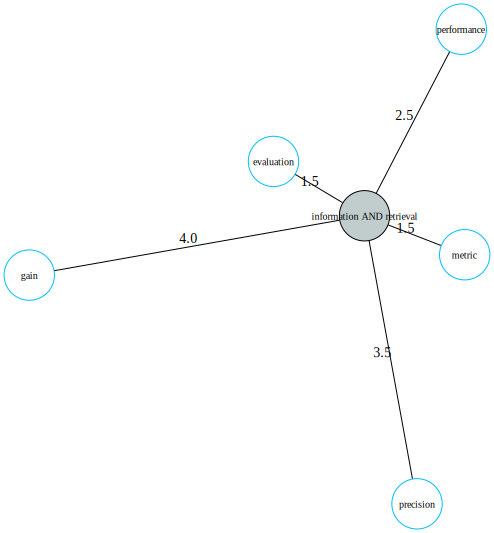

In [15]:
# Get the average similarity with all documents in the ranking, excluding its own document graphs
def get_avg_sim_with_all_sentences(doc_ranking_position: int, local_sentence_graph, include_ponderation: bool = False) -> float:
    avg_sim_values = []
    for index, doc in enumerate(ranking.get_documents()):
        if (doc_ranking_position - 1) != index:
            for s in doc.get_sentences():
                if s.get_graph().get_graph_as_dict():   # if the graph contains at least one neighbour term
                    avg_sim_values.append(local_sentence_graph.get_similarity_score_as_base_graph(s.get_graph(), include_ponderation))
    return np.mean(avg_sim_values)

# Top 2 sentence graphs by doc, comparing its similarity with the rest of sentences in the ranking, and calculating the mean of all the similarities
def get_top1_similarity_sentence(document_position: int, doc, include_ponderation: bool = False) -> tuple:
    top1_graph_sentences = []
    # first, get -> ((pos_in_doc_1, avg_sim_1), (pos_in_doc_2, avg_sim_2), ... , (pos_in_doc_N, avg_sim_N))
    for s in doc.get_sentences():
        if s.get_graph().get_graph_as_dict():   # if the graph contains at least one neighbour term
            top1_graph_sentences.append((s.get_position_in_doc(), get_avg_sim_with_all_sentences(doc.get_ranking_position(), s.get_graph(), include_ponderation)))
    
    top1_graph_sentences = sorted(top1_graph_sentences, key=lambda tuple: tuple[1], reverse=True)[:1]
    # return -> (document_position, pos_in_doc_first_place, avg_sim_first_place)
    return (document_position, top1_graph_sentences[0][0], top1_graph_sentences[0][1])


def print_top2_sentences_by_doc_similarity(include_ponderation: bool = False):
    g_docs_top1_sentences: list[tuple] = []

    for index in range(nr_search_results):
        g_docs_top1_sentences.append(get_top1_similarity_sentence(index, ranking.get_documents()[index], include_ponderation))

    g_docs_top1_sentences = sorted(g_docs_top1_sentences, key=lambda tuple: tuple[2], reverse=True)[:1]
    g_docs_top1_sentences = g_docs_top1_sentences[0]
    print(g_docs_top1_sentences)
    first_graph = ranking.get_documents()[g_docs_top1_sentences[0]].get_sentences()[g_docs_top1_sentences[1]].get_graph()
    visual_graph = first_graph.get_graph_viz('0.7', 'deepskyblue')
    return visual_graph
    

visual_graph = print_top2_sentences_by_doc_similarity(include_ponderation=False)
visual_graph

## Generating the 1st sentence graph of the ranking, as the user graph (Version 2)

(0, 0, np.float64(inf))


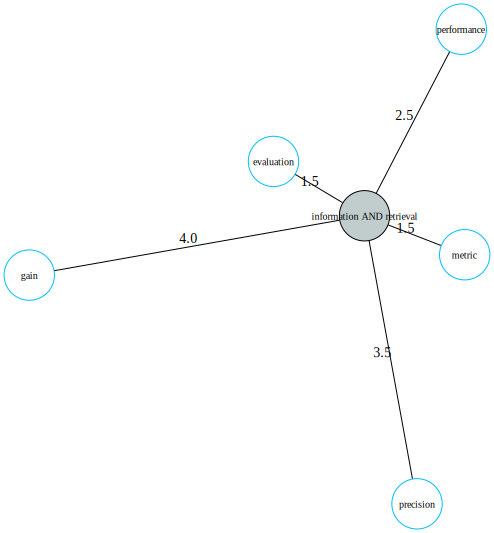

In [16]:
# Get the average similarity with all documents in the ranking, excluding its own document graphs
def get_avg_sim_with_all_sentences(doc_ranking_position: int, local_sentence_graph, include_ponderation: bool = False) -> float:
    avg_sim_values = []
    for index, doc in enumerate(ranking.get_documents()):
        if (doc_ranking_position - 1) != index:
            for s in doc.get_sentences():
                if s.get_graph().get_graph_as_dict():   # if the graph contains at least one neighbour term
                    avg_sim_values.append(local_sentence_graph.get_similarity_score_as_base_graph(s.get_graph(), include_ponderation))
    return np.mean(avg_sim_values)

# Top 2 sentence graphs by doc, comparing its similarity with the rest of sentences in the ranking, and calculating the mean of all the similarities
def get_top1_similarity_sentence(document_position: int, doc, include_ponderation: bool = False) -> tuple:
    top1_graph_sentences = []
    # first, get -> ((pos_in_doc_1, avg_sim_1), (pos_in_doc_2, avg_sim_2), ... , (pos_in_doc_N, avg_sim_N))
    for s in doc.get_sentences():
        if s.get_graph().get_graph_as_dict():   # if the graph contains at least one neighbour term
            top1_graph_sentences.append((s.get_position_in_doc(), get_avg_sim_with_all_sentences(doc.get_ranking_position(), s.get_graph(), include_ponderation)))
    
    top1_graph_sentences = sorted(top1_graph_sentences, key=lambda tuple: tuple[1], reverse=True)[:1]
    # return -> (document_position, pos_in_doc_first_place, avg_sim_first_place)
    return (document_position, top1_graph_sentences[0][0], top1_graph_sentences[0][1])


def print_top2_sentences_by_doc_similarity(include_ponderation: bool = False):
    first_doc_top1_graph_sentence = get_top1_similarity_sentence(0, ranking.get_documents()[0], include_ponderation)
    print(first_doc_top1_graph_sentence)
    first_graph = ranking.get_documents()[first_doc_top1_graph_sentence[0]].get_sentences()[first_doc_top1_graph_sentence[1]].get_graph()
    visual_graph = first_graph.get_graph_viz('0.7', 'deepskyblue')
    return visual_graph
    

visual_graph = print_top2_sentences_by_doc_similarity(include_ponderation=False)
visual_graph